In [2]:
import pandas as pd
import numpy as np
from os import getcwd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import scipy.stats as ss
from scipy.stats import norm
from scipy.stats import kurtosis, skew
from scipy.stats import linregress

In [3]:
pwd 

'/lab/sales'

In [4]:
data = pd.read_csv("../sales/data_values_clear/merge.csv", parse_dates=True)
data

index client_id sex  user_birthday   binning_age  user_age  \
0            0    c_4410   f           1967  (50.0, 60.0]        54   
1            1    c_4389   m           1984  (30.0, 40.0]        37   
2            2    c_5019   f           1977  (40.0, 50.0]        45   
3            3    c_7049   f           1987  (30.0, 40.0]        34   
4            4    c_5110   f           1982  (30.0, 40.0]        39   
...        ...       ...  ..            ...           ...       ...   
336708  336708    c_7135   m           1996  (20.0, 30.0]        25   
336709  336709    c_5828   f           1998  (20.0, 30.0]        23   
336710  336710    c_8260   m           1991  (20.0, 30.0]        30   
336711  336711    c_8138   f           1984  (30.0, 40.0]        37   
336712  336712    c_8327   m           1972  (40.0, 50.0]        49   

        category_id id_product  price                   sell_date  \
0                 0     0_1455   8.99  2021-03-22 14:29:25.189266   
1                 0     0_1455   8.99  2021-07-09 11:16:18.579726   
2                 0     0_1455   8.99  2022-01-15 00:01:53.456196   
3                 0     0_1455   8.99  2021-03-04 14:01:38.698752   
4                 0     0_1455   8.99  2021-09-05 11:48:41.065009   
...             ...        ...    ...                         ...   
336708            2       2_99  84.99  2021-07-11 20:56:49.820935   
336709            2       2_99  84.99  2021-11-21 01:53:46.967570   
336710            0      0_833   2.99  2021-09-27 23:22:40.394509   
336711            0      0_394   2.14  2021-11-09 09:02:38.299240   
336712            0      0_394   2.14  2021-12-28 22:44:11.200205   

       transaction_date  sell_year  month    month_string  \
0            2021-03-22       2021      3            Mars   
1            2021-07-09       2021      7         Juillet   
2            2022-01-15       2022      1  Janvier - 2022   
3            2021-03-04       2021      3            Mars   
4            2021-09-05       2021      9       Septembre   
...                 ...        ...    ...             ...   
336708       2021-07-11       2021      7         Juillet   
336709       2021-11-21       2021     11        Novembre   
336710       2021-09-27       2021      9       Septembre   
336711       2021-11-09       2021     11        Novembre   
336712       2021-12-28       2021     12        Decembre   

        traceability_transaction  
0                              1  
1                              1  
2                              1  
3                              1  
4                              1  
...                          ...  
336708                         1  
336709                         1  
336710                         1  
336711                         1  
336712                         1  

[336713 rows x 15 columns]

In [27]:
gp_month = data.groupby(['month_string']).sum().reset_index()
gp_month

month_string       index  user_birthday  user_age  category_id  \
0             Aout  4334833932       50665130   1092680        11850   
1            Avril  4840015445       56180727   1217694        10581   
2         Decembre  5355519104       64091729   1423028        14011   
3   Fevrier - 2022  4963763346       58458932   1303300        14129   
4   Janvier - 2022  4831170049       57956631   1310211        15300   
5          Juillet  4154881292       48886368   1056584        13125   
6             Juin  4500483452       53034239   1152813        12602   
7              Mai  4831393272       55851818   1215159        11413   
8             Mars  4813470535       56485184   1232555        11764   
9         Novembre  4624082930       55895885   1231722        15062   
10         Octobre  3825616426       42698007    909110         3986   
11       Septembre  5612424045       65754257   1452077        11016   

        price  sell_year   month  traceability_transaction  
0   479305.19   51757810  204880                     25610  
1   472980.72   57398421  113604                     28401  
2   522937.68   65514757  389004                     32417  
3   532740.88   59762232   59112                     29556  
4   522955.31   59266842   29311                     29311  
5   480898.66   49942952  172984                     24712  
6   481257.94   54187052  160872                     26812  
7   489367.95   57066977  141185                     28237  
8   479312.03   57717739   85677                     28559  
9   512890.17   57127607  310937                     28267  
10  319159.96   43607117  215770                     21577  
11  502771.28   67206334  299286                     33254

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

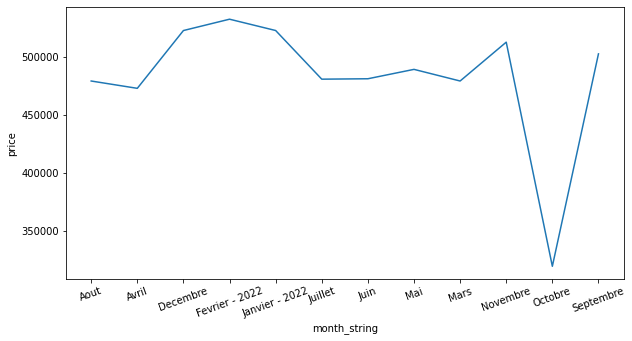

In [33]:
fig, ax = plt.subplots(figsize=[10,5])
sns.lineplot(x="month_string", y="price",data=gp_month)
plt.xticks(rotation=20)

In [5]:
category0 = data[data.category_id == 0]
category1 = data[data.category_id == 1]
category2 = data[data.category_id == 2]

## Moustache

([<matplotlib.axis.XTick at 0x7f7089a318b0>,
 [Text(1, 0, 'cat0'), Text(2, 0, 'cat1'), Text(3, 0, 'cat2')])

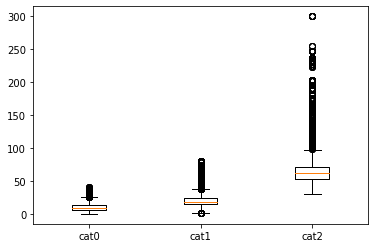

In [6]:
category0Price = category0['price'].tolist()
category1Price = category1['price'].tolist()
category2Price = category2['price'].tolist()
mergeCategoryPrice = [category0Price,category1Price,category2Price]

mergeCategoryPrice
BoxName = ['cat0', 'cat1', 'cat2']
plt.boxplot(mergeCategoryPrice)
plt.xticks([1,2,3], BoxName)

## KHI-2 Gaussienne

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

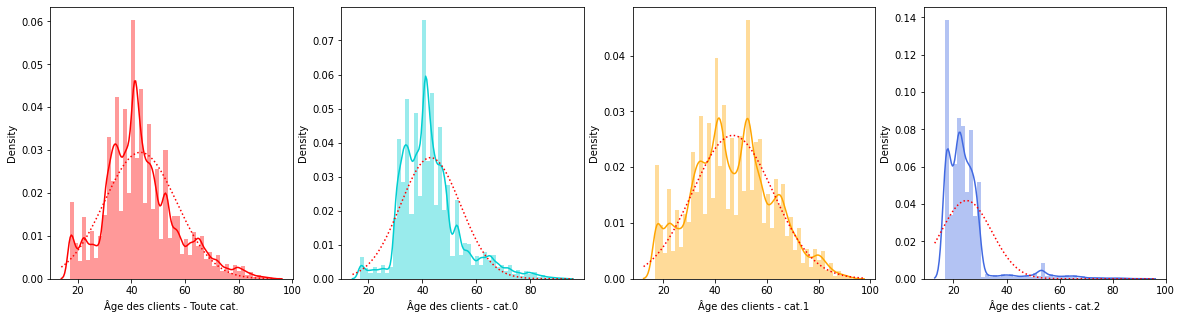

In [7]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(20,5))

courbeTtCat  = pd.Series(data.user_age, name="Âge des clients - Toute cat.")
x0 = pd.Series(category0.user_age, name="Âge des clients - cat.0")
x1 = pd.Series(category1.user_age, name="Âge des clients - cat.1")
x2 = pd.Series(category2.user_age, name="Âge des clients - cat.2")

sns.distplot(courbeTtCat, color="r", ax=ax1,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x0, color="darkturquoise", ax=ax2,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x1 , color="orange", ax=ax3,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x2 , color="royalblue", ax=ax4,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})

plt.show()

In [8]:
## Corrélation entre le genre et la catégorie d'achat 
contingenceKhi2 = pd.crosstab(data.sex, data.category_id)
contingenceKhi2

category_id       0      1     2
sex                             
f            103786  55469  8260
m            105640  54266  9292

In [9]:
chi2, p, dof, expected = ss.chi2_contingency(contingenceKhi2.values)

In [10]:
print(f'Le khi-2 est de {chi2:.2f}')

Le khi-2 est de 81.87


In [11]:
print('Avec 6 degrée de liberté')

Avec 6 degrée de liberté


<AxesSubplot:xlabel='category_id', ylabel='sex'>

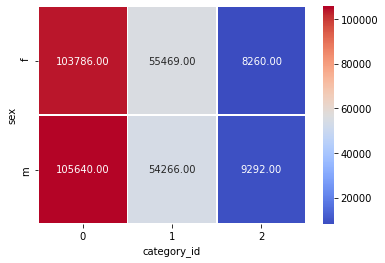

In [12]:
heat = contingenceKhi2[[0,1,2]].copy()
#heat = heat.drop(heat.index[len(khi2)-1])
sns.heatmap(heat, linewidth = .5, annot=True, cmap='coolwarm', fmt='.2f')

 ## Correlation  Cat-Age/CA

In [13]:
data.columns

Index(['index', 'client_id', 'sex', 'user_birthday', 'binning_age', 'user_age',
       'category_id', 'id_product', 'price', 'sell_date', 'transaction_date',
       'sell_year', 'month', 'month_string', 'traceability_transaction'],
      dtype='object')

In [14]:
catAgeCor = pd.crosstab(data.user_age, data.category_id).reset_index() 
catAgeCor = catAgeCor.rename(index=str, columns={0: "category_0",1: "category_1",2: "category_2" })

In [15]:
sexeAge = data.groupby(['sex','category_id','user_age']).sum().reset_index()
sexeAgeCat0 = sexeAge[sexeAge.category_id == 0][['sex','user_age','price']]
sexeAgeCat1 = sexeAge[sexeAge.category_id == 1][['sex','user_age','price']]
sexeAgeCat2 = sexeAge[sexeAge.category_id == 2][['sex','user_age','price']]

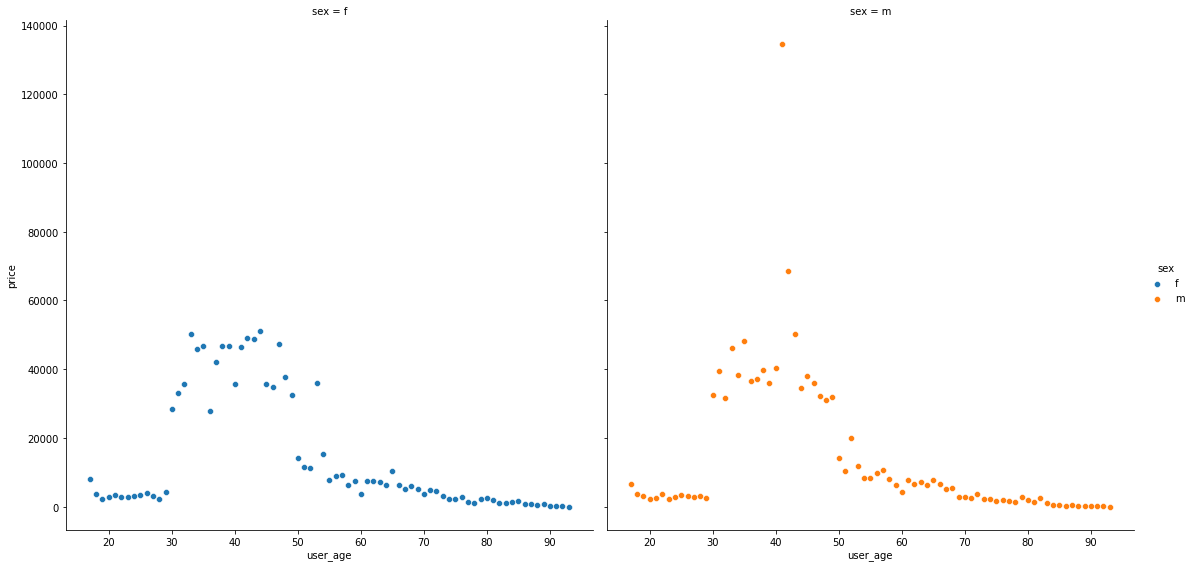

In [16]:
plotCat0 = sns.FacetGrid(sexeAgeCat0, col="sex", hue="sex",height=8)
plotCat0.map(sns.scatterplot, "user_age",'price', alpha=1)
plotCat0.add_legend()

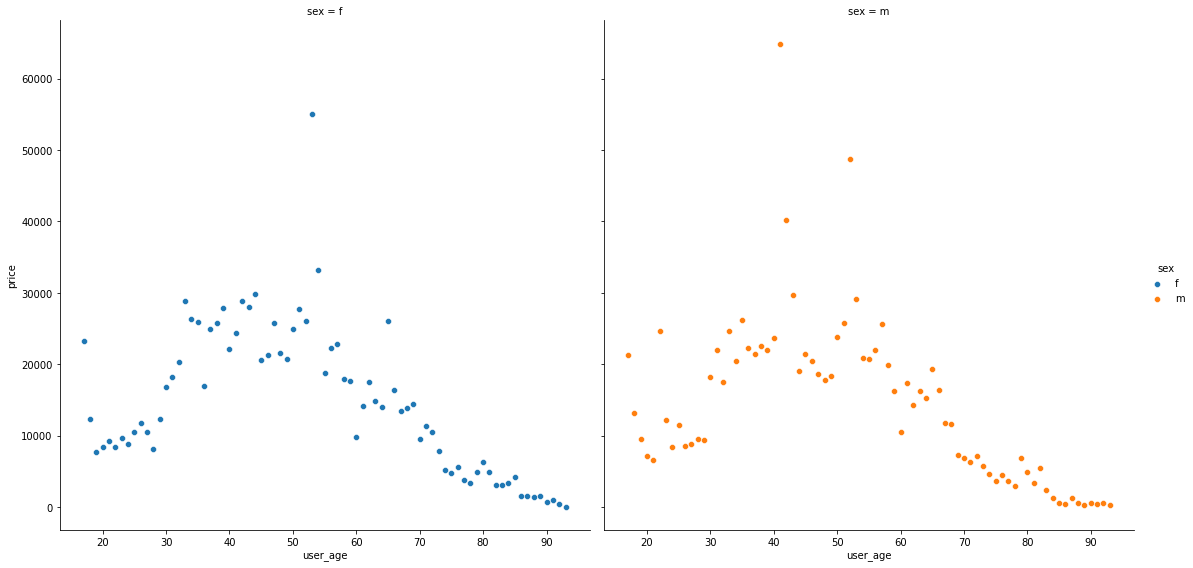

In [17]:
plotCat1 = sns.FacetGrid(sexeAgeCat1, col="sex", hue="sex",height=8)
plotCat1.map(sns.scatterplot, "user_age",'price', alpha=1)
plotCat1.add_legend()

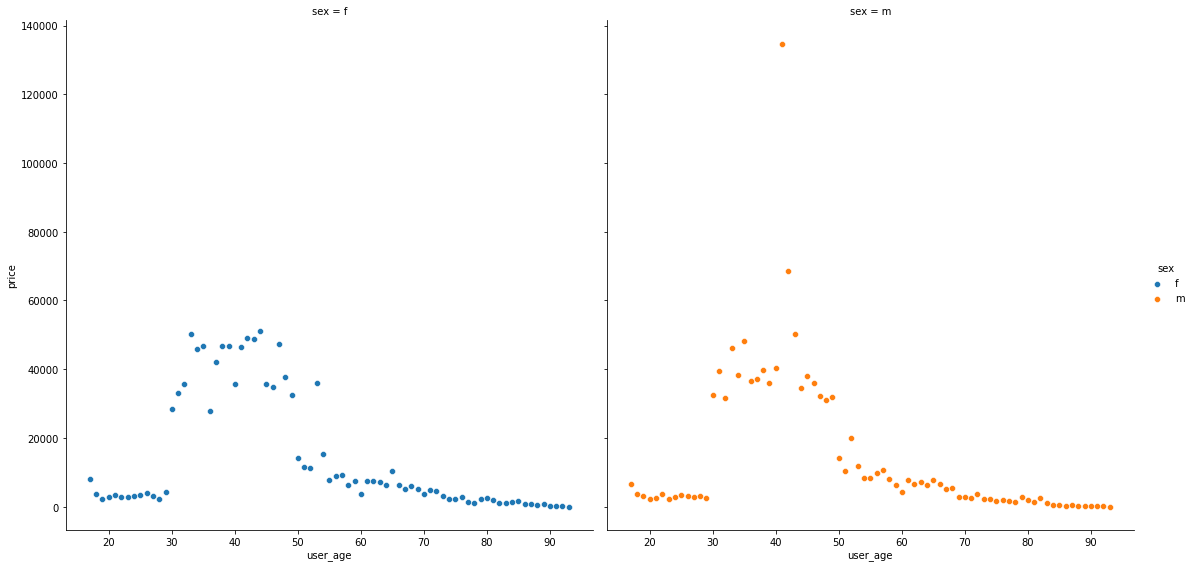

In [18]:
plotCat2 = sns.FacetGrid(sexeAgeCat0, col="sex", hue="sex",height=8)
plotCat2.map(sns.scatterplot, "user_age",'price', alpha=1)
plotCat2.add_legend()

## GINI Curve Lorenz

In [19]:
clientPrice = data.groupby(by=["client_id"]).sum().sort_values('price',ascending=False)

Text(0.5, 1.0, 'Ca des vente par client')

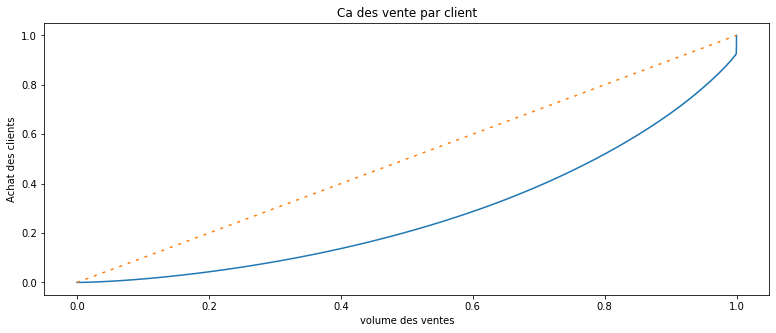

In [20]:
fig, (ax) = plt.subplots(1,1,figsize=(13,5))
depenses = clientPrice.loc[clientPrice['price'] != 0]
dep = depenses['price'].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0], lorenz)
plt.plot(np.linspace(0,1,len(lorenz)), lorenz, drawstyle='steps-post')
plt.plot(np.linspace(0,1,len(lorenz)), np.linspace(0,1,len(lorenz)), dashes=[2,4])
plt.xlabel('volume des ventes')
plt.ylabel('Achat des clients')
plt.title('Ca des vente par client')

In [21]:
## application de formule prise sur OC 
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini
## elle correspond a la répartion des ventes qui est de l'ordre des 40%

0.4397099070275071